In [5]:
import pandas as pd
import numpy as np
from datetime import datetime

In [6]:
pd.set_option('display.max_rows', 25)

# Stock and Commodity Values

## Aluminium and Copper

In [282]:
d_parser = lambda x: datetime.strptime(x, '%b-%y')
data_cu_al = pd.read_csv("D:\\finance\\src\\al-cu-price.csv", parse_dates=["Month"], date_parser=d_parser)

In [284]:
data_cu_al["Month"] = data_cu_al["Month"].apply(lambda x: datetime.strftime(x, '%Y-%m'))

data_cu_al.loc[data_cu_al["Aluminum ROC"] == '-', "Aluminum ROC"] = 0
data_cu_al.loc[data_cu_al["Copper, grade A cathode ROC"] == '-', "Copper, grade A cathode ROC"] = 0

data_cu_al["Aluminum ROC"] = data_cu_al["Aluminum ROC"].str.replace(r'%', r'0').astype('float')
data_cu_al["Copper, grade A cathode ROC"] = data_cu_al["Copper, grade A cathode ROC"].str.replace(r'%', r'0').astype('float')

data_cu_al["Aluminum Price (US Dollars per Metric Ton)"] = data_cu_al["Aluminum Price (US Dollars per Metric Ton)"].str.replace(',', '').astype('float')
data_cu_al["Copper, grade A cathode Price (US Dollars per Metric Ton)"] = data_cu_al["Copper, grade A cathode Price (US Dollars per Metric Ton)"].str.replace(',', '').astype('float')

In [322]:
data_cu_al2 = data_cu_al.copy()
data_cu_al2 = data_cu_al2.drop(["Aluminum ROC", "Copper, grade A cathode ROC", "Aluminum / Copper, grade A cathode Price Ratio"], axis=1)
data_cu_al2 = data_cu_al2.rename(columns={"Month" : "Date", "Aluminum Price (US Dollars per Metric Ton)" : "Al", "Copper, grade A cathode Price (US Dollars per Metric Ton)" : "copper2"})
data_cu_al2

,Date,Al,copper2
0,2008-01,2445.52,7061.02
1,2008-02,2776.93,7887.69
2,2008-03,3005.29,8439.29
3,2008-04,2959.27,8684.93
4,2008-05,2902.90,8382.75
...,...,...,...
175,2022-08,2430.79,7981.84
176,2022-09,2224.76,7746.01
177,2022-10,2255.54,7651.08
178,2022-11,2350.72,8049.86


## Copper Historical Values 1959 - Today

In [377]:
d_parser = lambda x: datetime.strptime(x, '%Y-%m-%d')
data_cu = pd.read_csv("D:\\finance\\src\\copper-prices-historical-chart-data.csv", parse_dates=["date"], date_parser=d_parser)
data_cu = data_cu.rename(columns={"date" : "Date"})

data_cu

,Date,value
0,1959-07-02,0.2930
1,1959-07-06,0.2910
2,1959-07-07,0.2820
3,1959-07-08,0.2846
4,1959-07-09,0.2760
...,...,...
15954,2023-03-04,NaN
15955,2023-03-05,NaN
15956,2023-03-06,NaN
15957,2023-03-07,NaN


In [372]:
data_cu.dtypes

Date      datetime64[ns]
 value           float64
dtype: object

In [385]:
df_cu = data_cu.rename(columns={ " value" : "Copper"})
df_cu         

,Date,Copper
0,1959-07-02,0.2930
1,1959-07-06,0.2910
2,1959-07-07,0.2820
3,1959-07-08,0.2846
4,1959-07-09,0.2760
...,...,...
15954,2023-03-04,NaN
15955,2023-03-05,NaN
15956,2023-03-06,NaN
15957,2023-03-07,NaN


## Aluminium Historical Values 200 - Today

In [333]:
d_parser = lambda x: datetime.strptime(x, '%m/%d/%Y')
data_al = pd.read_csv("D:\\finance\\src\\Aluminium_Historical_Data.csv", parse_dates=["Date"], date_parser=d_parser)

#Convert volume from string to int
data_al['Vol.'] = data_al['Vol.'].fillna(0)
data_al['Vol.'] = data_al['Vol.'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

#Convert change % to float
data_al["Change %"] = data_al["Change %"].str.replace(r'%', r'0').astype('float')

#Convert $ values to floats
column_list = ["Price", "Open", "High", "Low"]
for column in column_list:
    data_al[column] = data_al[column].str.replace(',', '').astype('float')

data_al

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-02-16,2422.50,2402.00,2424.50,2375.00,0,1.59
1,2023-02-15,2384.50,2398.00,2393.00,2390.50,0,-0.98
2,2023-02-14,2408.00,2420.00,2419.00,2420.00,43630,-0.19
3,2023-02-13,2412.50,2430.00,2424.00,2424.00,54610,-1.15
4,2023-02-10,2440.50,2468.00,2465.00,2465.00,44190,-2.34
...,...,...,...,...,...,...,...
2190,2014-06-20,1888.50,1888.50,1888.50,1888.50,18510,-0.11
2191,2014-06-19,1890.50,1890.50,1890.50,1890.50,26660,0.85
2192,2014-06-18,1874.50,1874.50,1874.50,1874.50,26120,1.21
2193,2014-06-17,1852.00,1852.00,1852.00,1852.00,45550,0.64


In [363]:
data_al.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                 int32
Change %           float64
dtype: object

In [387]:
df_al = data_al.drop(["Open", "High", "Low", "Vol.", "Change %"], axis=1)
df_al = df_al.rename(columns={"Price" : "Aluminium"})
df_al

,Date,Aluminium
0,2023-02-16,2422.50
1,2023-02-15,2384.50
2,2023-02-14,2408.00
3,2023-02-13,2412.50
4,2023-02-10,2440.50
...,...,...
2190,2014-06-20,1888.50
2191,2014-06-19,1890.50
2192,2014-06-18,1874.50
2193,2014-06-17,1852.00


## South32 Ltd Stock Prices

In [388]:
d_parser = lambda x: datetime.strptime(x, '%Y-%m-%d')
data_s32 = pd.read_csv("D:\\finance\\src\\S32-historical-max.csv", parse_dates=["Date"], date_parser=d_parser)

data_s32

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-18,2.13,2.22,2.01,2.05,1.738346,160185286
1,2015-05-19,2.17,2.34,2.16,2.33,1.975779,192730310
2,2015-05-20,2.35,2.37,2.25,2.36,2.001218,59085150
3,2015-05-21,2.35,2.45,2.34,2.37,2.009698,54016569
4,2015-05-22,2.36,2.39,2.30,2.31,1.958820,38646976
...,...,...,...,...,...,...,...
1959,2023-02-09,4.68,4.72,4.66,4.69,4.690000,13261399
1960,2023-02-10,4.68,4.69,4.58,4.58,4.580000,13638584
1961,2023-02-13,4.60,4.64,4.54,4.58,4.580000,20136910
1962,2023-02-14,4.67,4.68,4.63,4.64,4.640000,13282276


In [369]:
data_s32.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [391]:
df_s32 = data_s32.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis=1)
df_s32 = df_s32.rename(columns={"Close" : "S32"})
df_s32

,Date,S32
0,2015-05-18,2.05
1,2015-05-19,2.33
2,2015-05-20,2.36
3,2015-05-21,2.37
4,2015-05-22,2.31
...,...,...
1959,2023-02-09,4.69
1960,2023-02-10,4.58
1961,2023-02-13,4.58
1962,2023-02-14,4.64


## BHP ASX Stock Prices

In [402]:
d_parser = lambda x: datetime.strptime(x, '%Y-%m-%d')
data_bhp = pd.read_csv("D:\\finance\\src\\BHP-AX.txt", parse_dates=["Date"], date_parser=d_parser)

data_bhp

,Date,Open,High,Low,Close,Adj Close,Volume
0,1988-02-01,2.295866,2.295866,2.295866,2.295866,0.583026,0.0
1,1988-02-02,2.295866,2.295866,2.295866,2.295866,0.583026,0.0
2,1988-02-03,2.295866,2.295866,2.295866,2.295866,0.583026,0.0
3,1988-02-04,2.295866,2.295866,2.295866,2.295866,0.583026,0.0
4,1988-02-05,2.295866,2.295866,2.295866,2.295866,0.583026,0.0
...,...,...,...,...,...,...,...
8994,2023-02-13,47.779999,48.020000,47.630001,47.869999,47.869999,7354717.0
8995,2023-02-14,47.990002,48.200001,47.650002,47.720001,47.720001,5799869.0
8996,2023-02-15,48.200001,48.250000,47.570000,47.939999,47.939999,6687104.0
8997,2023-02-16,47.990002,48.299999,47.759998,48.119999,48.119999,14993848.0


In [403]:
data_bhp.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [404]:
df_bhp = data_bhp.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis=1)
df_bhp = df_bhp.rename(columns={"Close" : "BHP"})

df_bhp

,Date,BHP
0,1988-02-01,2.295866
1,1988-02-02,2.295866
2,1988-02-03,2.295866
3,1988-02-04,2.295866
4,1988-02-05,2.295866
...,...,...
8994,2023-02-13,47.869999
8995,2023-02-14,47.720001
8996,2023-02-15,47.939999
8997,2023-02-16,48.119999


# Analysis

## Combine Multiple Dataframes

In [405]:
import functools as ft

dfs = [df_cu, df_al, df_s32, df_bhp]

df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)

In [406]:
df_final.corr()

,Copper,Aluminium,S32,BHP
Copper,1.000000,0.916406,0.693214,0.826754
Aluminium,0.916406,1.000000,0.808676,0.682061
S32,0.693214,0.808676,1.000000,0.643757
BHP,0.826754,0.682061,0.643757,1.000000


### Old code

In [358]:
combined = pd.merge(data_s32, data_cu, how="inner")
combined['Date'] = pd.to_datetime(combined['Date'])
combined = combined.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis=1)
combined = combined.rename(columns={"Close" : "S32", " value" : "Copper"})


In [345]:
combined.corr()

,Open,High,Low,s32,Adj Close,Volume,copper 1
Open,1.000000,0.999361,0.999341,0.998536,0.990679,-0.098637,0.696240
High,0.999361,1.000000,0.999332,0.999400,0.991542,-0.088810,0.695380
Low,0.999341,0.999332,1.000000,0.999417,0.991020,-0.104605,0.694654
s32,0.998536,0.999400,0.999417,1.000000,0.991605,-0.095509,0.694504
Adj Close,0.990679,0.991542,0.991020,0.991605,1.000000,-0.110536,0.742036
Volume,-0.098637,-0.088810,-0.104605,-0.095509,-0.110536,1.000000,-0.161596
copper 1,0.696240,0.695380,0.694654,0.694504,0.742036,-0.161596,1.000000


In [348]:
[combined.dtypes, data_al.dtypes]

[Date        datetime64[ns]
 s32                float64
 copper 1           float64
 dtype: object,
 Date        datetime64[ns]
 Price              float64
 Open               float64
 High               float64
 Low                float64
 Vol.                 int32
 Change %           float64
 dtype: object]

In [359]:
data_al_copy = data_al.copy()
data_al_copy = data_al_copy.drop(["Low", "Open", "High", "Vol.", "Change %"], axis=1)
data_al_copy = data_al_copy.rename(columns={"Price" : "Aluminium"})
combined2 = pd.merge(combined, data_al_copy, how="inner")

In [357]:
combined2.corr()

,s32,copper 1,aluminium 1
s32,1.000000,0.693214,0.808676
copper 1,0.693214,1.000000,0.916406
aluminium 1,0.808676,0.916406,1.000000


In [189]:
combined2.tail(10)

,Date,s32,copper 1
1913,2023-02,4.72,4.0944
1914,2023-02,4.68,4.0384
1915,2023-02,4.61,4.0464
1916,2023-02,4.64,4.0768
1917,2023-02,4.74,4.0544
1918,2023-02,4.69,4.0768
1919,2023-02,4.58,4.0256
1920,2023-02,4.58,4.0720
1921,2023-02,4.64,4.1008
1922,2023-02,4.62,4.0960


In [190]:
combined2.groupby(['Date'], as_index=False).mean()

,Date,s32,copper 1
0,2015-05,2.260000,2.808278
1,2015-06,2.019048,2.653876
2,2015-07,1.778636,2.477636
3,2015-08,1.607381,2.326500
4,2015-09,1.528810,2.363429
...,...,...,...
89,2022-10,3.728095,3.424152
90,2022-11,3.969545,3.656582
91,2022-12,4.147000,3.816640
92,2023-01,4.494000,4.125280


In [208]:
combined2.dtypes

Date         object
s32         float64
copper 1    float64
dtype: object

# New

## Commodities

In [2]:
%%capture
!pip install yfinance

import yfinance as yf
import functools as ft

In [3]:
def reduce(commodity, name, *argv):
    commodity[name + ' price'] = commodity["Close"]
    column_list = [name + ' price'] + [arg for arg in argv]
    return commodity[column_list]

In [7]:
TODAY = datetime.today().strftime('%Y-%m-%d')
START = '2015-01-01'
END = TODAY
mineral_codes = {"Gold" : "GC=F", "Silver" : "SI=F", "Platinum" : "PL=F", "Copper" : "HG=F", "Palladium" : "PA=F", "Crude Oil" : "CL=F", "Heating Oil" : "HO=F", "Natural Gas" : "NG=F"}

In [8]:
mineral_futures_prices = {mineral : yf.download(code, START, END)  for mineral, code in mineral_codes.items()}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
mineral_futures_price_only = [reduce(mineral_futures_prices[mineral], mineral) for mineral in mineral_futures_prices.keys()] 

In [10]:
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='Date'), mineral_futures_price_only)

In [15]:
df_final.corr()

,Gold price,Silver price,Platinum price,Copper price,Palladium price,Crude Oil price,Heating Oil price,Natural Gas price
Gold price,1.000000,0.860662,0.154564,0.748592,0.911702,0.435242,0.408520,0.406553
Silver price,0.860662,1.000000,0.504993,0.772303,0.762349,0.391954,0.297808,0.326778
Platinum price,0.154564,0.504993,1.000000,0.333323,0.099136,0.138530,0.067318,0.039820
Copper price,0.748592,0.772303,0.333323,1.000000,0.729091,0.750731,0.662051,0.585374
Palladium price,0.911702,0.762349,0.099136,0.729091,1.000000,0.405849,0.366444,0.330917
Crude Oil price,0.435242,0.391954,0.138530,0.750731,0.405849,1.000000,0.946528,0.791383
Heating Oil price,0.408520,0.297808,0.067318,0.662051,0.366444,0.946528,1.000000,0.842256
Natural Gas price,0.406553,0.326778,0.039820,0.585374,0.330917,0.791383,0.842256,1.000000


## Stocks

In [12]:
mining_stocks = {"Rio Tinto" : "RIO.AX", "Newcrest Mining" : "NCM.AX", "BHP" : "BHP.AX", "Fortescue" : "FMG.AX", "South32" : "S32.AX", "Northern Star" : "NST.AX", "Mineral Resources" : "MIN.AX", "Evolution Mining" : "EVN.AX", "IGO" : "IGO.AX", "Pilbara Minerals" : "PLS.AX"}

In [13]:
mineral_futures_prices = {mineral : yf.download(code, START, END)  for mineral, code in mineral_codes.items()}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
big_df = yf.download(list(mining_stocks.values()), START, END)

[*********************100%***********************]  10 of 10 completed


In [121]:
type(big_df)

pandas.core.frame.DataFrame

In [310]:
big_df["Close"]

,BHP.AX,EVN.AX,FMG.AX,IGO.AX,MIN.AX,NCM.AX,NST.AX,PLS.AX,RIO.AX,S32.AX
Date,,,,,,,,,,
2015-01-02,27.603399,0.601150,2.830000,4.45,7.860000,10.960000,1.51,0.044,58.330002,NaN
2015-01-05,27.547335,0.647039,2.820000,4.51,8.370000,11.450000,1.58,0.044,58.480000,NaN
2015-01-06,26.267149,0.679162,2.790000,4.48,8.010000,11.730000,1.67,0.044,57.590000,NaN
2015-01-07,26.267149,0.734229,2.740000,4.39,7.810000,11.690000,1.71,0.048,57.290001,NaN
2015-01-08,26.519447,0.715874,2.670000,4.40,7.760000,11.640000,1.65,0.049,58.650002,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-02-15,47.939999,3.030000,22.000000,14.12,86.650002,24.309999,11.73,4.720,123.330002,4.62
2023-02-16,48.119999,2.970000,22.320000,14.05,86.669998,23.900000,11.38,4.690,123.680000,4.66
2023-02-17,48.000000,2.890000,22.260000,13.54,85.070000,23.570000,11.39,4.440,124.260002,4.53


In [126]:
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='Date'), mineral_futures_price_only)

In [124]:
mineral_futures_price_only.append(big_df["Close"])

In [137]:
df_final.corr()[8:18]

,Gold price,Silver price,Platinum price,Copper price,Palladium price,Crude Oil price,Heating Oil price,Natural Gas price,BHP.AX_x,EVN.AX_x,...,BHP.AX_y,EVN.AX_y,FMG.AX_y,IGO.AX_y,MIN.AX_y,NCM.AX_y,NST.AX_y,PLS.AX_y,RIO.AX_y,S32.AX_y
BHP.AX_x,0.795541,0.682753,0.137333,0.828131,0.870647,0.629454,0.582133,0.407301,1.000000,0.641451,...,1.000000,0.641451,0.860176,0.732262,0.774144,0.515648,0.724388,0.574542,0.971742,0.649569
EVN.AX_x,0.744764,0.570747,-0.190672,0.399131,0.773735,0.069237,-0.011788,-0.051787,0.641451,1.000000,...,0.641451,1.000000,0.650478,0.210720,0.331406,0.899391,0.935580,0.083285,0.744177,0.191376
FMG.AX_x,0.943041,0.869003,0.211230,0.817464,0.904807,0.502405,0.467046,0.461265,0.860176,0.650478,...,0.860176,0.650478,1.000000,0.739627,0.854729,0.490938,0.713696,0.632156,0.890122,0.433448
IGO.AX_x,0.696244,0.565426,0.185759,0.778598,0.610083,0.789713,0.843161,0.740744,0.732262,0.210720,...,0.732262,0.210720,0.739627,1.000000,0.933755,0.131313,0.381427,0.933425,0.672467,0.697359
MIN.AX_x,0.779544,0.689230,0.171719,0.832163,0.690663,0.705150,0.736917,0.681419,0.774144,0.331406,...,0.774144,0.331406,0.854729,0.933755,1.000000,0.196637,0.482559,0.919858,0.756739,0.647978
NCM.AX_x,0.594941,0.437588,-0.176966,0.242618,0.619601,0.030786,-0.038080,-0.119063,0.515648,0.899391,...,0.515648,0.899391,0.490938,0.131313,0.196637,1.000000,0.834456,-0.009475,0.619407,0.174547
NST.AX_x,0.798883,0.551752,-0.217792,0.429993,0.832737,0.151634,0.132366,0.047218,0.724388,0.935580,...,0.724388,0.935580,0.713696,0.381427,0.482559,0.834456,1.000000,0.260096,0.812757,0.280011
PLS.AX_x,0.563478,0.460260,0.076632,0.700071,0.450139,0.750945,0.814239,0.744263,0.574542,0.083285,...,0.574542,0.083285,0.632156,0.933425,0.919858,-0.009475,0.260096,1.000000,0.533950,0.684048
RIO.AX_x,0.841972,0.696401,0.054482,0.794445,0.909961,0.542927,0.493118,0.343761,0.971742,0.744177,...,0.971742,0.744177,0.890122,0.672467,0.756739,0.619407,0.812757,0.533950,1.000000,0.602414
S32.AX_x,0.380553,0.275647,-0.021496,0.697459,0.376407,0.835152,0.815989,0.630392,0.649569,0.191376,...,0.649569,0.191376,0.433448,0.697359,0.647978,0.174547,0.280011,0.684048,0.602414,1.000000


## Investing.com

In [21]:
!pip install investpy

import investpy as ip

  Using cached investpy-1.0.8.tar.gz (4.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 235.9/235.9 kB 2.9 MB/s eta 0:00:00
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481634 sha256=74a7d5a0a8745c4aaa828c96578a00c17d4e0527f472d41336e21c04fe2574f6
  Stored in directory: c:\users\s.brentnall_saigespo\appdata\local\pip\cache\wheels\53\e9\48\f7edac9f1d5f25d986d947300521a43164182fe8a6030fc349
Successfully built investpy


In [22]:
aluminium = ip.get_stock_historical_data(stock="AAPL", country="United States", from_date='01/01/2015', to_date='18/02/2023')
aluminium

ConnectionError: ERR#0015: error 403, try again later.

In [ ]:
df = ip.get_stock_historical_data(stock='AAPL',
                                        country='United States',
                                        from_date='01/01/2010',
                                        to_date='01/01/2020')
print(df.head())

## Relative Strength Indicator (RSI)

In [223]:
%%capture
!pip install matplotlib
import matplotlib.pyplot as plt

In [379]:
def relative_strength(price_series, period):
    del_up = price_series.diff()
    del_up[del_up<0] = 0
    avg_up = del_up.rolling(period).mean()

    del_down = price_series.diff()
    del_down[del_down>0] = 0
    avg_down = del_down.rolling(period).mean().abs()
    
    rsi = 100 * avg_up / (avg_up + avg_down)
    rsi.dropna(inplace=True)
    
    return rsi

def rsi_plot(price_series, period = 14):

    # Set the theme of our chart
    plt.style.use('fivethirtyeight')

    # Make our resulting figure much bigger
    plt.rcParams['figure.figsize'] = (16, 5)

    # Create two charts on the same figure.
    ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
    ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

    # First chart:
    # Plot the closing price on the first chart
    ax1.plot(price_series, linewidth=2)
    ax1.set_title('South32 Close Price')

    rsi = relative_strength(price_series, period)
    
    # Second chart
    # Plot the RSI
    ax2.set_title('Relative Strength Index')
    ax2.plot(rsi, color='orange', linewidth=1)
    # Add two horizontal lines, signalling the buy and sell ranges.
    # Oversold
    ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
    # Overbought
    ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')

    plt.show()

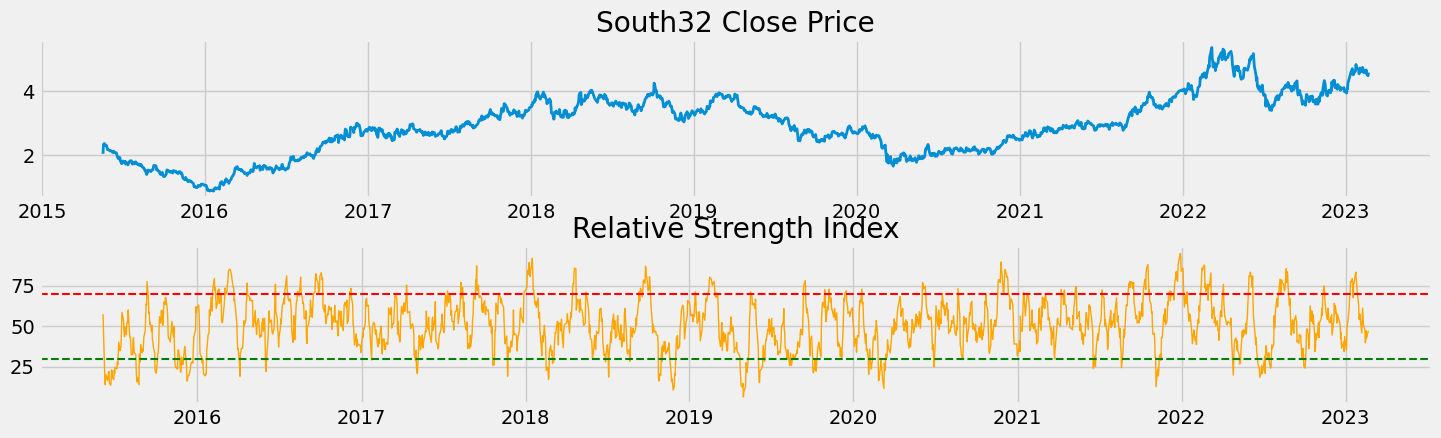

In [380]:
rsi_plot(big_df["Close"]["S32.AX"])

## Derivative

In [127]:
%%capture
!pip install scikit-learn
from sklearn.model_selection import train_test_split

In [94]:
my_series = big_df["Close"]["BHP.AX"][-12:-1]

In [113]:
my_series

Date
2023-02-02    48.849998
2023-02-03    47.910000
2023-02-06    48.200001
2023-02-07    48.009998
2023-02-08    48.099998
2023-02-09    48.119999
2023-02-10    48.000000
2023-02-13    47.869999
2023-02-14    47.720001
2023-02-15    47.939999
2023-02-16    48.119999
Name: BHP.AX, dtype: float64

In [166]:
#my_series.iloc[:, 1:2]

X = np.array([np.arange(1, len(my_series)+1)]).T
y = np.array(my_series)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [167]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

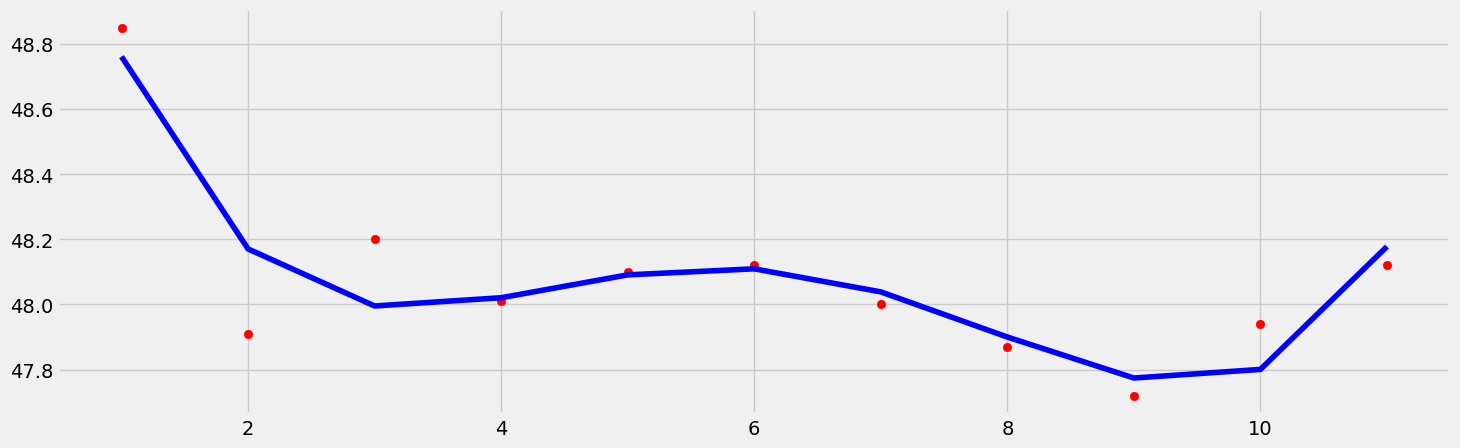

In [171]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    #plt.title('Truth or Bluff (Linear Regression)')
    #plt.xlabel('Position level')
    #plt.ylabel('Salary')
    #plt.show()
    return
viz_polymonial()

In [146]:
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [147]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [148]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

## Change in Volume

In [183]:
delta_close = big_df["Close"]["BHP.AX"].diff()
delta_volume = big_df["Volume"]["BHP.AX"].diff()

## Price vs Float

In [402]:
def df_price_volume(stock, stock_name, price_series, start_date, end_date=None):
    tickobj = yf.Ticker(stock)
    tickobj_float = tickobj.get_shares_full(start = start_date, end = end_date)
    
    volume = pd.DataFrame(data = tickobj_float)
    volume.reset_index(drop=False, inplace=True)
    volume.rename(columns={"index" : "Datetime", 0 : stock_name + " float"}, inplace=True)
    volume['Datetime'] = volume['Datetime'].dt.tz_localize(None)
    volume["Datetime"] = pd.to_datetime(vol["Datetime"], format="%d/%m/%Y")
    
    price = pd.DataFrame(price_series)
    price.reset_index(drop=False, inplace=True)
    price.rename(columns={"Date" : "Datetime"}, inplace=True)
    
    price_volume = pd.merge(price, volume, how="outer", on="Datetime", sort=True)
    price_volume = price_volume.loc[price_volume["Datetime"] > start_date]
    price_volume[stock_name + " float"].interpolate(inplace=True)
    price_volume[stock].interpolate(inplace=True)
    
    return price_volume

def plot_price_volume(stock, stock_name, price_series, start_date, end_date=None):
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (16, 5)
    
    price_volume = df_price_volume(stock, stock_name, price_series, start_date, end_date)
    
    fig, ax1 = plt.subplots()
    
    ax1.plot(price_volume["Datetime"], price_volume[stock_name + " float"])
    ax1.xaxis.grid()
    ax1.yaxis.grid()
    ax1.set_ylabel("Public Stock Float Quantity")
    
    ax2 = ax1.twinx()
    ax2.plot(price_volume["Datetime"], price_volume[stock], "orange")
    ax2.set_ylabel("Price (AUD)")
    
    fig.legend(["Stock float", "Stock price"])
    fig.suptitle(stock_name)
    plt.show()

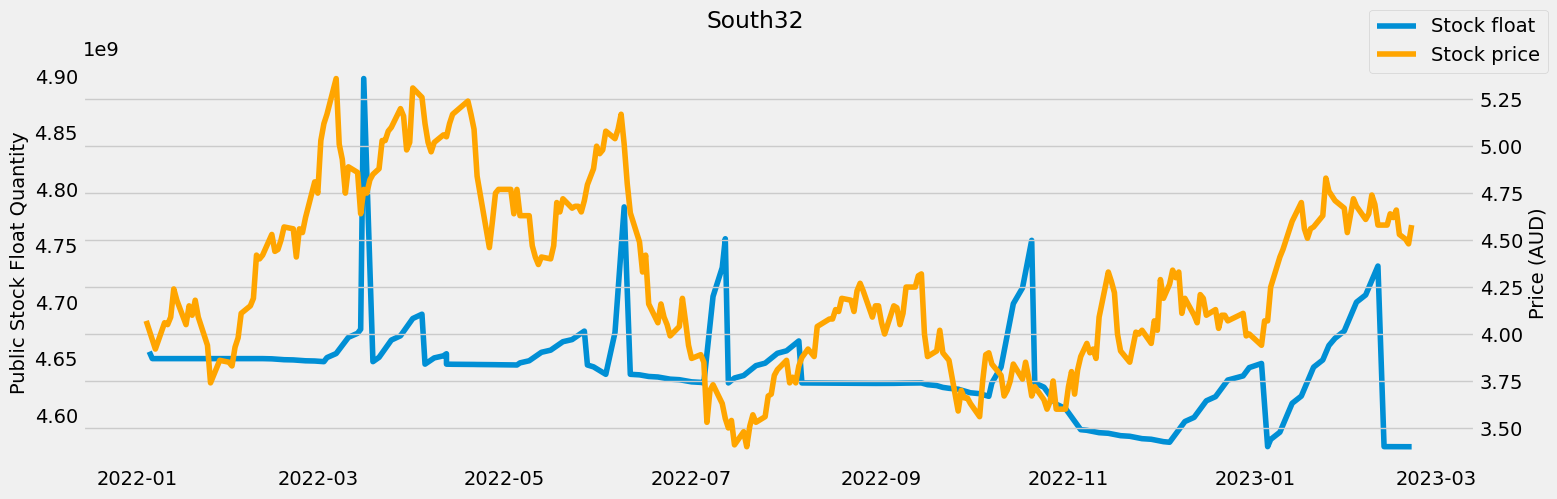

In [403]:
plot_price_volume("S32.AX", "South32", big_df["Close"]["S32.AX"], "2022-01-01")

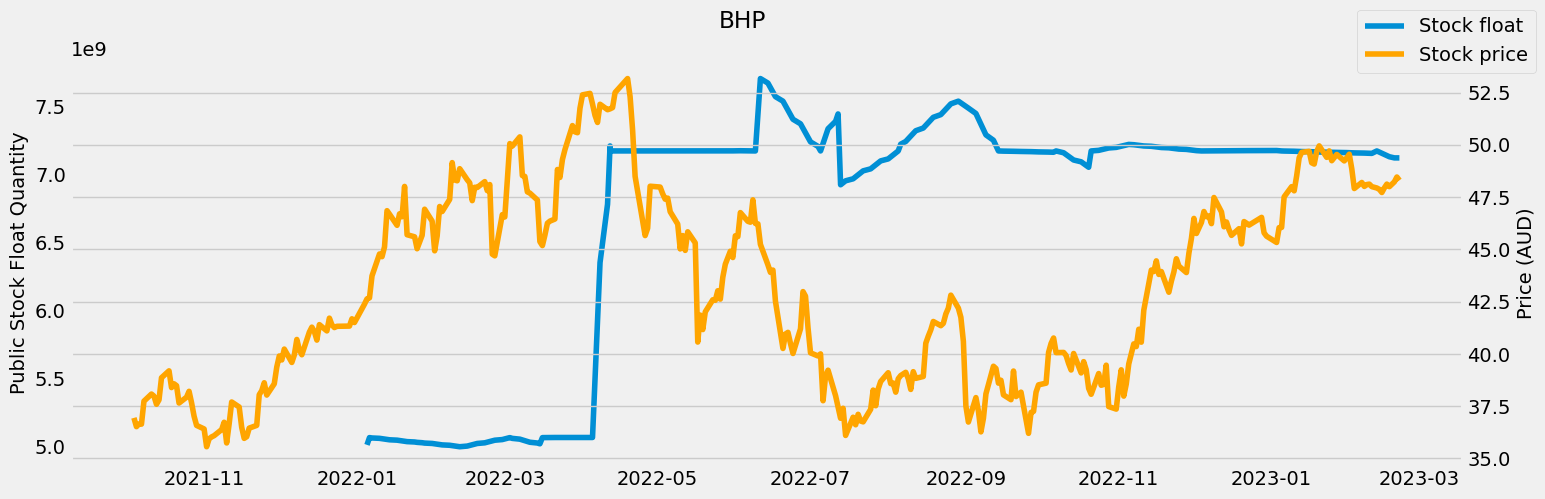

In [404]:
plot_price_volume("BHP.AX", "BHP", big_df["Close"]["BHP.AX"], "2021-10-01")

## Stock Volatility

In [35]:
# Naive volatility


s32 = big_df["Close"][["S32.AX"]].dropna()
s32

expectation_value = s32.mean()
s32["SquaredDeviation"] = (s32 - expectation_value) ** 2

total_squared_deviation = np.sum(s32["SquaredDeviation"])

variance = total_squared_deviation / len(s32["SquaredDeviation"])
print("The mean is: {}.\nThe total deviation^2 is: {}.\nThe variance is: {}.".format(expectation_value, total_squared_deviation, variance))

The mean is: S32.AX    2.919312
dtype: float64.
The total deviation^2 is: 1666.055050939866.
The variance is: 0.8079801410959583.


In [137]:
def volatility(price_series):
    expectation_value = price_series.dropna().mean()           #Expectation value should be changeable, this is naive version.
    print(expectation_value)
    total_squared_deviation = np.sum((price_series - expectation_value) ** 2)
    print(total_squared_deviation)
    variance = total_squared_deviation / len(price_series.dropna())
    print(variance)
    return variance

In [138]:
volatility(big_df["Close"]["S32.AX"])

2.9193118363240456
1666.055050939866
0.8461427379074993


0.8461427379074993

In [98]:
def volatility2(price_series, window):
    #df = pd.DataFrame(big_df["Close"]["S32.AX"])
    expectation_value = price_series.rolling(window).mean().copy()           #Expectation value should be changeable, this is naive version.
    
    squared_deviation = ((price_series - expectation_value) ** 2) #wrong
    variance = (total_squared_deviation / window).sum()
    return variance

In [99]:
volatility2(big_df["Close"]["S32.AX"], 1000)

0.24783020503870767

In [102]:
big_df["Close"]["S32.AX"].dropna().head(20)

Date
2015-05-18    2.05
2015-05-19    2.33
2015-05-20    2.36
2015-05-21    2.37
2015-05-22    2.31
2015-05-25    2.32
2015-05-26    2.30
2015-05-27    2.25
2015-05-28    2.18
2015-05-29    2.19
2015-06-01    2.16
2015-06-02    2.14
2015-06-03    2.15
2015-06-04    2.15
2015-06-05    2.14
2015-06-09    2.09
2015-06-10    2.10
2015-06-11    2.13
2015-06-12    2.10
2015-06-15    2.08
Name: S32.AX, dtype: float64

In [101]:
expectation_value = big_df["Close"]["S32.AX"].rolling(10).mean().copy()
expectation_value.dropna().head(20)

Date
2015-05-29    2.2660
2015-06-01    2.2770
2015-06-02    2.2580
2015-06-03    2.2370
2015-06-04    2.2150
2015-06-05    2.1980
2015-06-09    2.1750
2015-06-10    2.1550
2015-06-11    2.1430
2015-06-12    2.1350
2015-06-15    2.1240
2015-06-16    2.1160
2015-06-17    2.1100
2015-06-18    2.0980
2015-06-19    2.0790
2015-06-22    2.0540
2015-06-23    2.0345
2015-06-24    2.0185
2015-06-25    1.9985
2015-06-26    1.9710
Name: S32.AX, dtype: float64

In [96]:
total_squared_deviation = ((big_df["Close"]["S32.AX"] - expectation_value) ** 2).rolling(10).sum()
len(total_squared_deviation.dropna())
#(total_squared_deviation / 10).rolling(10).sum()

1951

In [117]:
df = big_df["Close"][["S32.AX"]].dropna()
df["expectation_value"] = big_df["Close"]["S32.AX"].rolling(10).mean()
df["deviation"] = ((df["S32.AX"] - df["expectation_value"])**2).rolling(min_periods=1, window=10).sum() / 10
#df["deviation"] = 
len(df)

1969

In [140]:
price_sery = big_df["Close"]["S32.AX"].dropna()
expectation_value = price_sery.rolling(1969).mean()
deviation = ((price_sery - expectation_value)**2)#.rolling(1969)#.sum() / 1969
print("The mean is: {}.\nThe total deviation^2 is: {}.\nThe variance is: {}.".format(expectation_value, deviation, variance))

The mean is: Date
2015-05-18         NaN
2015-05-19         NaN
2015-05-20         NaN
2015-05-21         NaN
2015-05-22         NaN
                ...   
2023-02-16         NaN
2023-02-17         NaN
2023-02-20         NaN
2023-02-21         NaN
2023-02-22    2.919312
Name: S32.AX, Length: 1969, dtype: float64.
The total deviation^2 is: Date
2015-05-18         NaN
2015-05-19         NaN
2015-05-20         NaN
2015-05-21         NaN
2015-05-22         NaN
                ...   
2023-02-16         NaN
2023-02-17         NaN
2023-02-20         NaN
2023-02-21         NaN
2023-02-22    2.791199
Name: S32.AX, Length: 1969, dtype: float64.
The variance is: 0.8079801410959583.


In [134]:
expectation_value

Date
2015-05-18         NaN
2015-05-19         NaN
2015-05-20         NaN
2015-05-21         NaN
2015-05-22         NaN
                ...   
2023-02-16         NaN
2023-02-17         NaN
2023-02-20         NaN
2023-02-21         NaN
2023-02-22    2.919312
Name: S32.AX, Length: 1969, dtype: float64